线性判别分析Linear Discriminant Analysis.    
平方判别分析 Quadratic Discriminant Analysis.

LDA, QDA

isotropic 各向同性。在所有方向上分布相同。    
isotropic_covariance：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
def make_data(n_samples, n_features, cov_class_1, cov_class_2, seed=0):
    rng = np.random.RandomState(seed)
    X = np.concatenate(
        [
            rng.randn(n_samples, n_features) @ cov_class_1,
            rng.randn(n_samples, n_features) @ cov_class_2 + np.array([1, 1]), # 向右上平移
        ]
    )
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return X, y

情形1： 两个类别具有相同的协方差矩阵, 且协方差具有球面特性

In [3]:
covariance = np.array([
    [1, 0],
    [0, 1]
])
X, y = make_data(
    n_samples=1000,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0
)

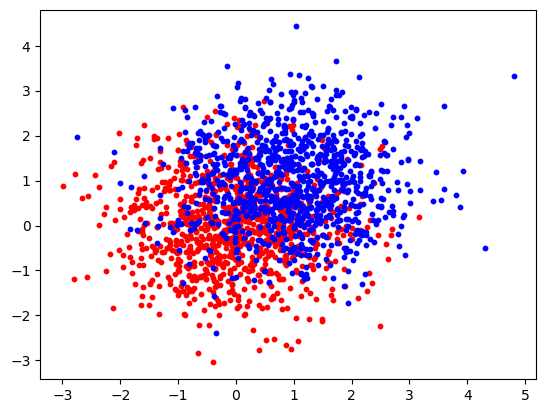

In [4]:
fig = plt.figure()
plt.scatter(X[:1000, 0], X[:1000, 1], s= 10, c='red')
plt.scatter(X[1000:, 0], X[1000:, 1], s= 10, c='blue')

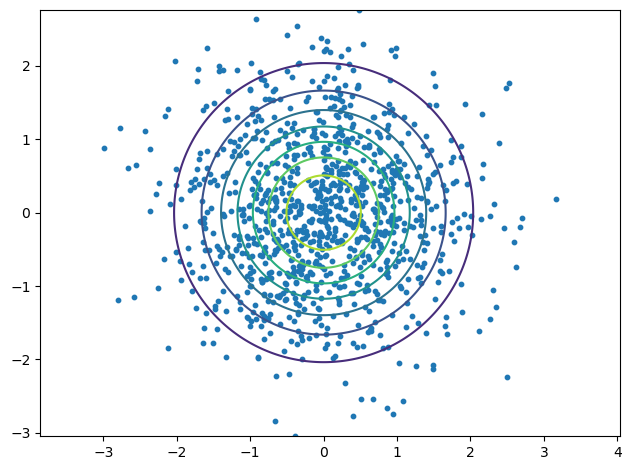

In [5]:
# 二维等高线图，
def plot_contour(x1, x2, y_func):
    fig = plt.figure()
    x1_space = np.linspace(min(x1), max(x1), 1000)
    x2_space = np.linspace(min(x2), max(x2), 1000)
    x1_grid, x2_grid = np.meshgrid(x1_space, x2_space)
    y_grid = y_func(np.column_stack([x1_grid.ravel(), x2_grid.ravel()]))
    y_grid = y_grid.reshape(x1_grid.shape)
    
    plt.contour(x1_grid, x2_grid, y_grid)
    plt.scatter(x1, x2, s=10)
    plt.axis('equal')
    plt.tight_layout()
rv = multivariate_normal(mean=[0, 0], cov= covariance.T @ covariance)
plot_contour(X[:1000, 0], X[:1000, 1], y_func=rv.pdf)

## 比较LDA和QDA
- LDA和QDA都假设服从高斯分布
- LDA的每类协方差矩阵相同，决策边界是直线
- QDA的每类协方差矩阵不同，决策边界是曲线

In [6]:
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis
)
lda = LinearDiscriminantAnalysis(
    solver= 'svd',
    store_covariance=True
)
qda = QuadraticDiscriminantAnalysis(
    store_covariance=True
)

lda.fit(X, y)

LinearDiscriminantAnalysis(store_covariance=True)

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import colors
def plot_result(estimator, X, y, ax):
    cmap = colors.ListedColormap(['tab:red', 'tab:blue'])
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method = 'predict_proba',
        plot_method = 'pcolormesh',
        ax = ax,
        cmap = 'RdBu',
        alpha = 0.3
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, alpha=0.5, cmap=cmap)
    ax.scatter(X_wrong[:, 0], X_wrong[:, 1], c=y_wrong, s=20, alpha=0.9, marker ='x',cmap=cmap)
    ax.scatter(estimator.means_[:, 0], estimator.means_[:, 1], c='yellow', s=100,marker='*')

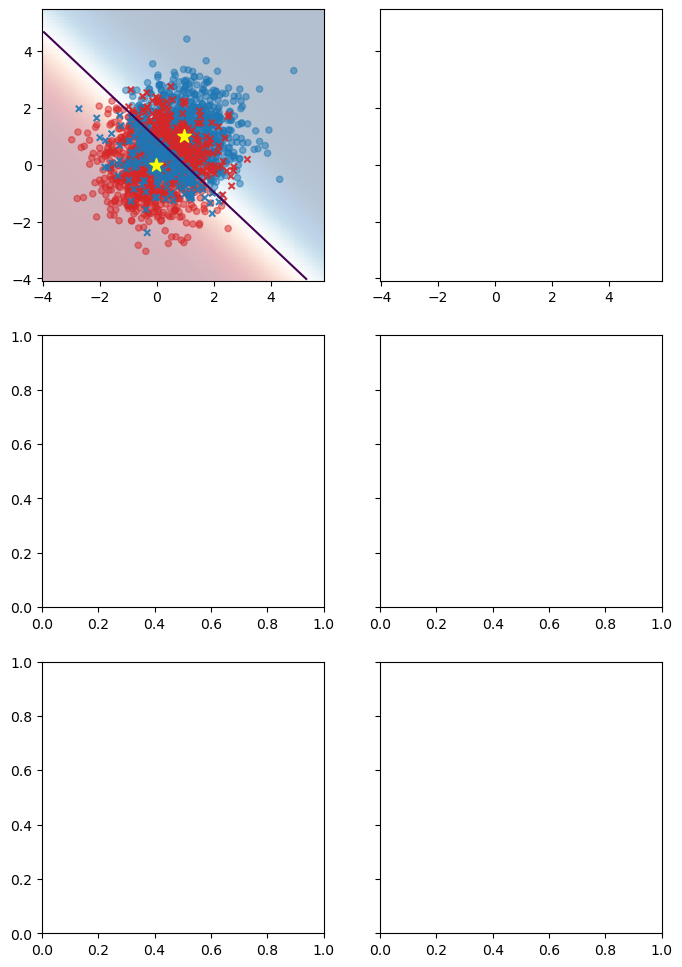

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='row', sharey='row', figsize=(8,12))
plot_result(lda, X, y, axes[0,0])